### load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dfl = []

In [3]:
fnl = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday']

In [4]:
for filename in fnl:
    df = pd.read_csv(f'../data/{filename}.csv', delimiter=';')
    dfl.append(df)
    print(f'read {filename}')

read monday
read tuesday
read wednesday
read thursday
read friday


In [5]:
for df in dfl:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.rename(columns = {'customer_no':'customer'}, inplace = True)

In [6]:
dfl[0].head()

,timestamp,customer,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


### add checkout if missing

In [7]:
for df in dfl:
    
    opening_time = df.timestamp.min()
    closing_time = df.timestamp.max() + pd.DateOffset(minutes=1)
    print(opening_time)
    print(closing_time)
    
    for i in df.customer.unique():
        if df[(df.customer == i) & (df.location == 'checkout')].empty:
            df.loc[len(df)] = [closing_time, i, 'checkout']
            print(f'customer {i} force checkout')
    print(df.customer.max() , df[df.location == 'checkout'].location.count())

print('done')

2019-09-02 07:03:00
2019-09-02 21:51:00
customer 1430 force checkout
customer 1433 force checkout
customer 1437 force checkout
customer 1439 force checkout
customer 1440 force checkout
customer 1441 force checkout
customer 1443 force checkout
customer 1445 force checkout
customer 1446 force checkout
customer 1447 force checkout
1447 1447
2019-09-03 07:02:00
2019-09-03 21:51:00
customer 1411 force checkout
customer 1422 force checkout
1422 1422
2019-09-04 07:00:00
2019-09-04 21:50:00
customer 1520 force checkout
customer 1527 force checkout
customer 1528 force checkout
customer 1529 force checkout
customer 1530 force checkout
1531 1531
2019-09-05 07:00:00
2019-09-05 21:50:00
customer 1527 force checkout
customer 1532 force checkout
customer 1533 force checkout
1535 1535
2019-09-06 07:00:00
2019-09-06 21:51:00
customer 1494 force checkout
customer 1496 force checkout
customer 1500 force checkout
customer 1503 force checkout
customer 1505 force checkout
customer 1506 force checkout
custom

### total number of customers in each section

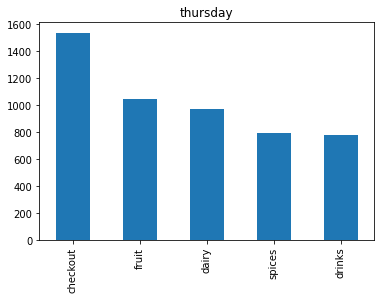

In [8]:
# choose day (0...4)
day = 3

dfl[day].location.value_counts().plot.bar()
plt.title(fnl[day])
plt.show()

### total number of customers in each section (+ checkout) over time

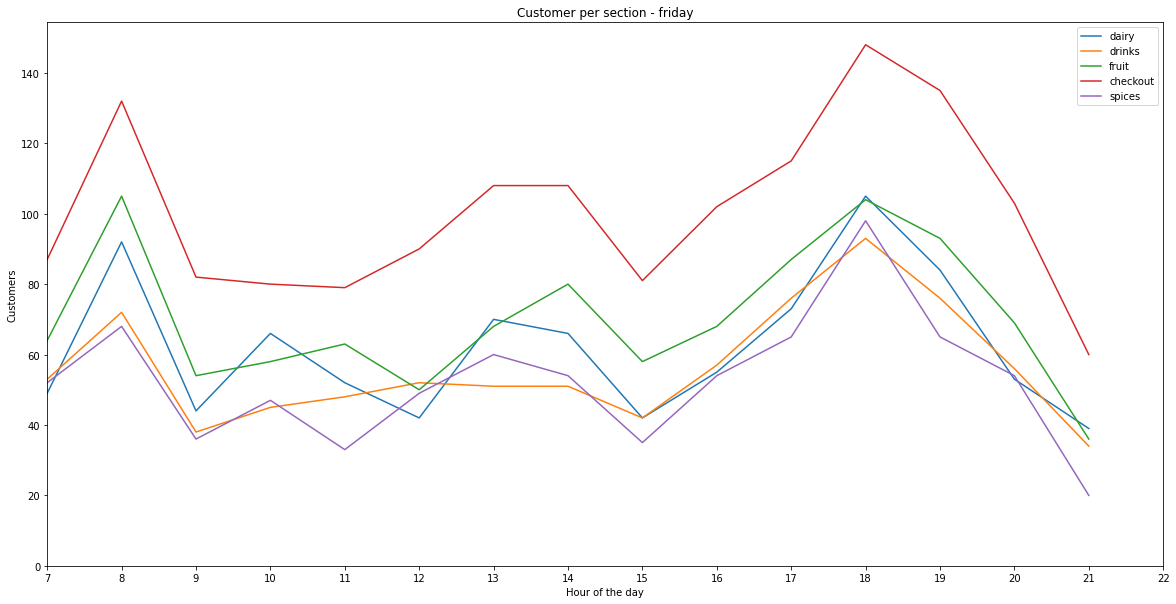

In [21]:
# choose day (0...4)
day = 4

plt.figure(figsize=(20,10))
for myloc in dfl[day].location.unique():
    dfl[day][dfl[day].location == myloc].groupby(dfl[day]['timestamp'].dt.hour)['location'].count().plot(label=myloc)
plt.xlim(7,21)
plt.ylim(0,)
plt.xticks(np.arange(7, 23, 1))
plt.title(f'Customer per section - {fnl[day]}')
plt.xlabel('Hour of the day')
plt.ylabel('Customers')
plt.legend()
plt.show()

###  time each customer spents in the market

In [10]:
# choose day (0...4)
day = 4

customers = pd.DataFrame(columns=['customer', 't_start', 't_spent'])

for cid in dfl[day].customer.unique():
    mydf = dfl[day][dfl[day].customer == cid]
    mytime = (mydf.timestamp.max() - mydf.timestamp.min()) / np.timedelta64(1, 'm')
    customers = customers.append({'customer': cid, 't_start': mydf.timestamp.min(), 't_spent': mytime}, ignore_index = True)

In [11]:
customers

,customer,t_start,t_spent
0,1,2019-09-06 07:00:00,5.0
1,2,2019-09-06 07:00:00,1.0
2,3,2019-09-06 07:00:00,11.0
3,4,2019-09-06 07:01:00,1.0
4,5,2019-09-06 07:01:00,14.0
...,...,...,...
1505,1506,2019-09-06 21:48:00,3.0
1506,1507,2019-09-06 21:48:00,2.0
1507,1508,2019-09-06 21:48:00,2.0
1508,1509,2019-09-06 21:50:00,1.0


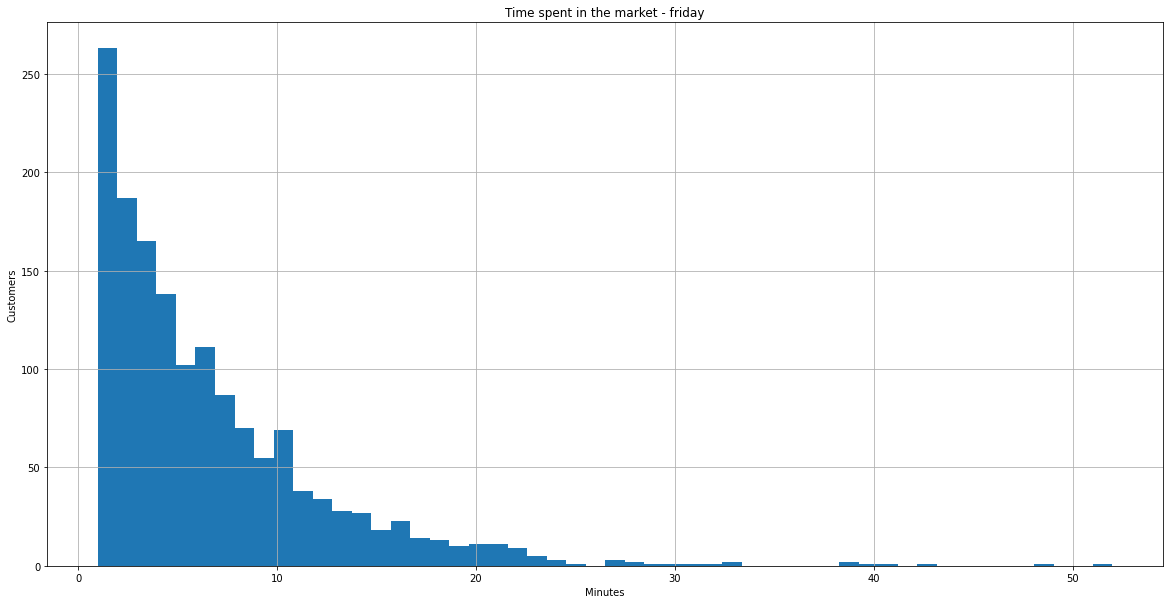

In [12]:
customers.hist(column='t_spent', bins=int(customers['t_spent'].max()), figsize=(20,10))
plt.title(f'Time spent in the market - {fnl[day]}')
plt.xlabel('Minutes')
plt.ylabel('Customers')
plt.show()

### total number of customers in the supermarket over time

In [13]:
timeline = pd.DataFrame(np.zeros([900, 1]), columns=['customers'], dtype='float')

In [14]:
for index, row in customers.iterrows():
    i = (row['t_start'].hour - 7) * 60 + row['t_start'].minute
    di = int(row['t_spent'])
    for j in range(di):
        timeline.iloc[i + j].customers += 1

In [15]:
timeline

,customers
0,3.0
1,4.0
2,5.0
3,6.0
4,5.0
...,...
895,0.0
896,0.0
897,0.0
898,0.0


In [16]:
customers['t_spent'].sum(), timeline['customers'].sum()

(9571.0, 9571.0)

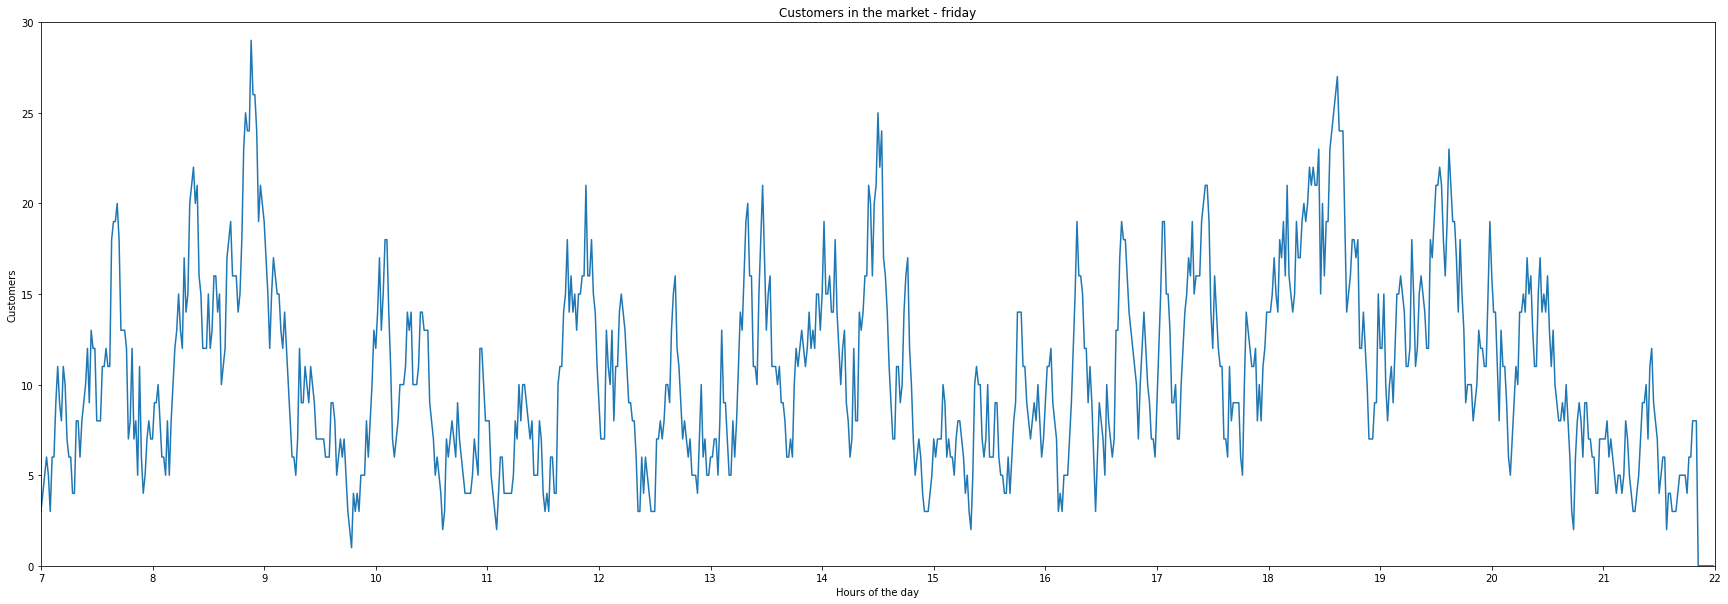

In [17]:
plt.figure(figsize=(30,10))
plt.title(f'Customers in the market - {fnl[day]}')
plt.xlim(7,22)
plt.ylim(0,30)
plt.xticks(np.arange(7, 23, 1))
plt.xlabel('Hours of the day')
plt.ylabel('Customers')
plt.plot(timeline.index/60 + 7, timeline.customers)
plt.show()